In [3]:
import h5py as h5
import matplotlib.pyplot as plt
import numpy as np

In [4]:
wn_grid = np.genfromtxt('/home/pagliaro/ASPAGenerator/all_instruments_binned_1600.grid')

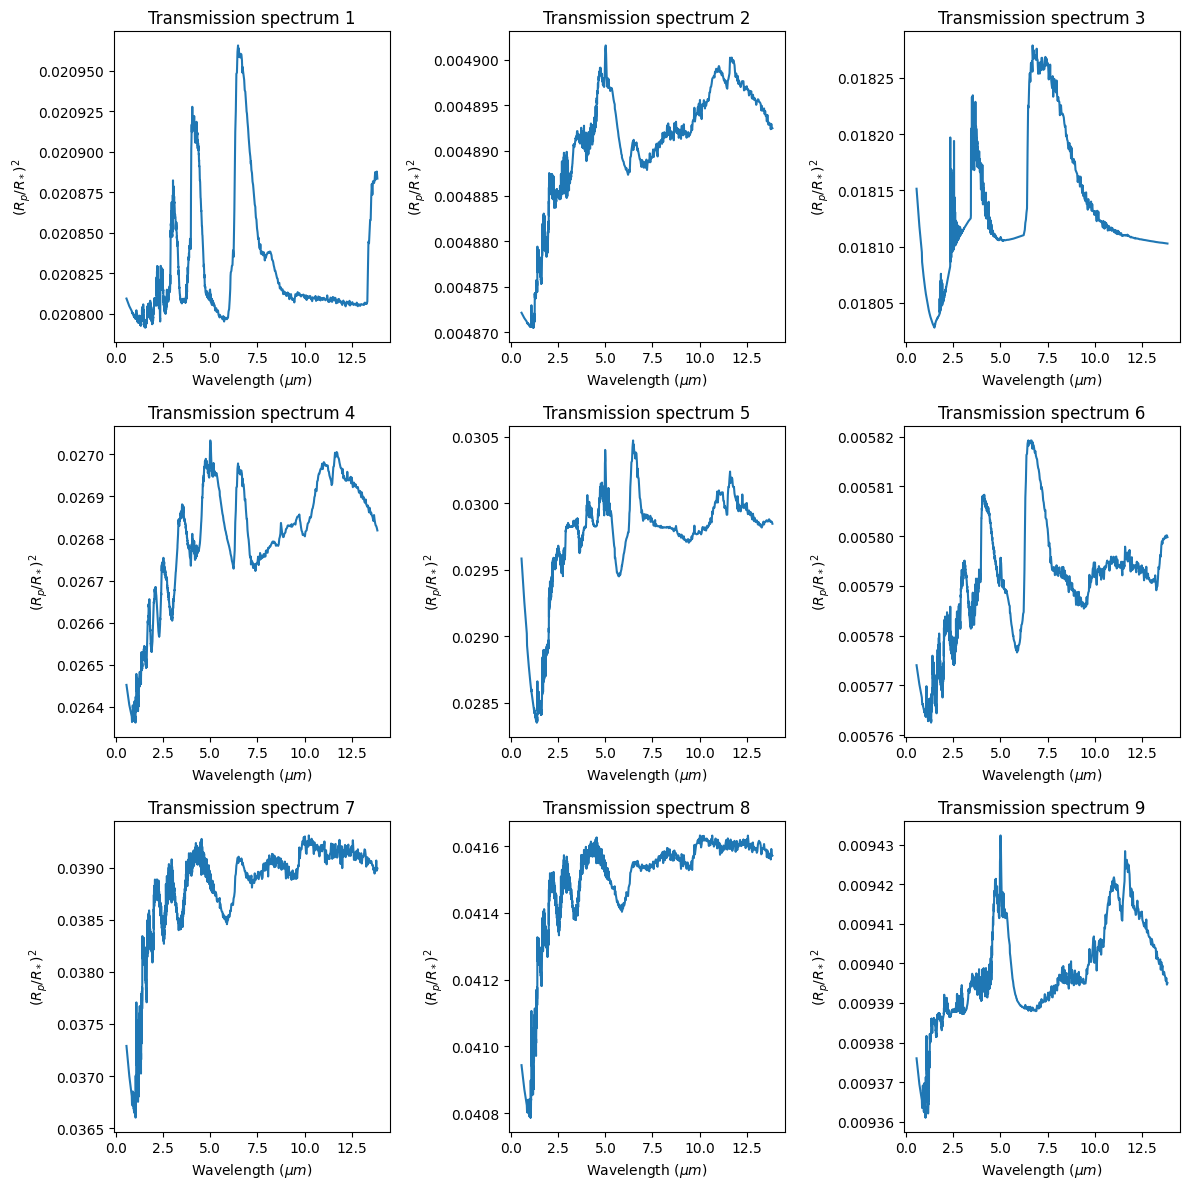

In [5]:
path = '/home/pagliaro/Dataset_mpi/Spectra/kraken16022024145305.h5'
file_spec_pars = h5.File(path, 'r')
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i, ax in enumerate(axs.flat):
    ax.plot(wn_grid, list(file_spec_pars[f'{np.random.randint(0, 15000)}']['rprs'])[::-1])
    ax.set_xlabel(f'Wavelength ($\mu m$)')
    ax.set_ylabel(f'$(R_p/R_*)^2$')
    ax.set_title(f'Transmission spectrum {i+1}')

plt.tight_layout()

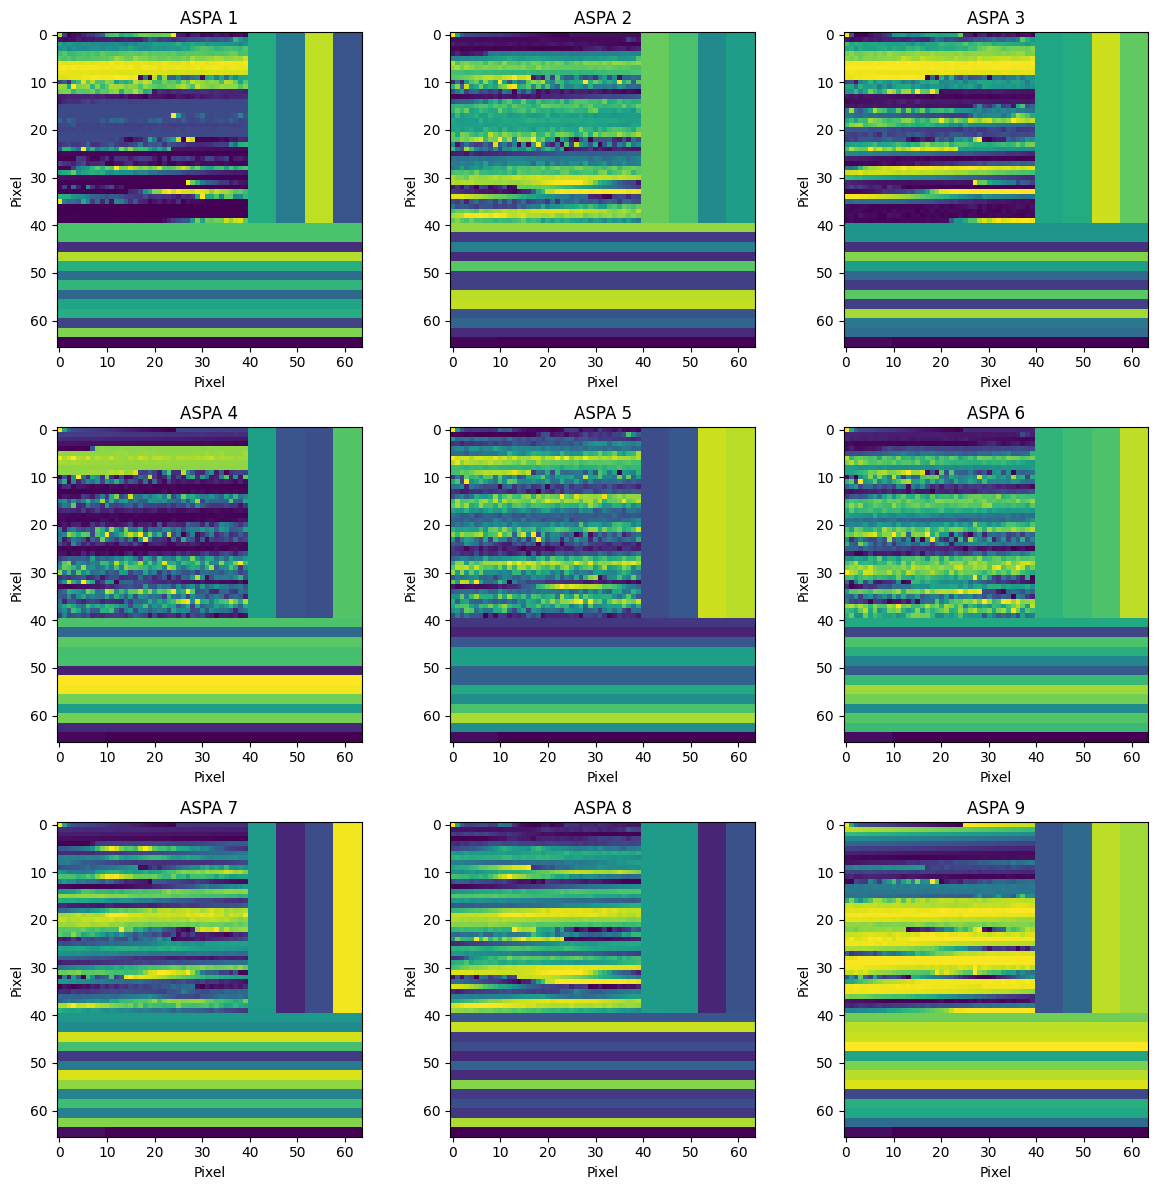

In [6]:
path = '/home/pagliaro/Dataset_mpi/ASPAs/kraken16022024145319.h5'
file_aspa = h5.File(path, 'r')
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i, ax in enumerate(axs.flat):
    ax.imshow(np.array(list(file_aspa[str(i)])))
    ax.set_xlabel(f'Pixel')
    ax.set_ylabel(f'Pixel')
    ax.set_title(f'ASPA {i+1}')

plt.tight_layout()

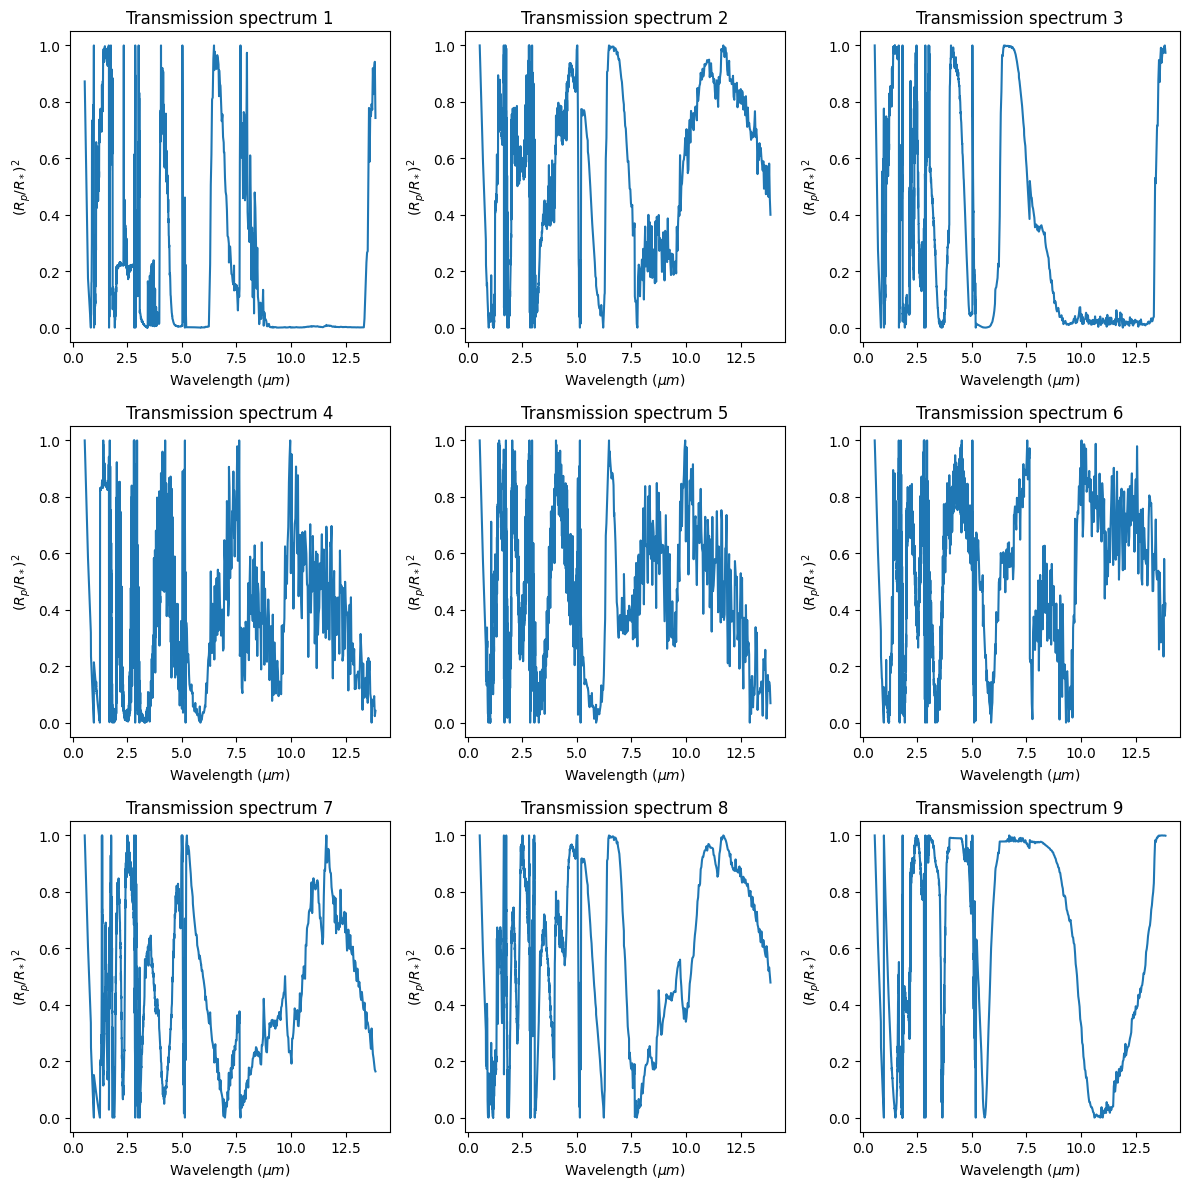

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i, ax in enumerate(axs.flat):
    spectrum = np.reshape(np.array(list(file_aspa[str(i)]))[:40, :40, :], (1600, ))
    ax.plot(wn_grid, spectrum)
    ax.set_xlabel(f'Wavelength ($\mu m$)')
    ax.set_ylabel(f'$(R_p/R_*)^2$')
    ax.set_title(f'Transmission spectrum {i+1}')

plt.tight_layout()

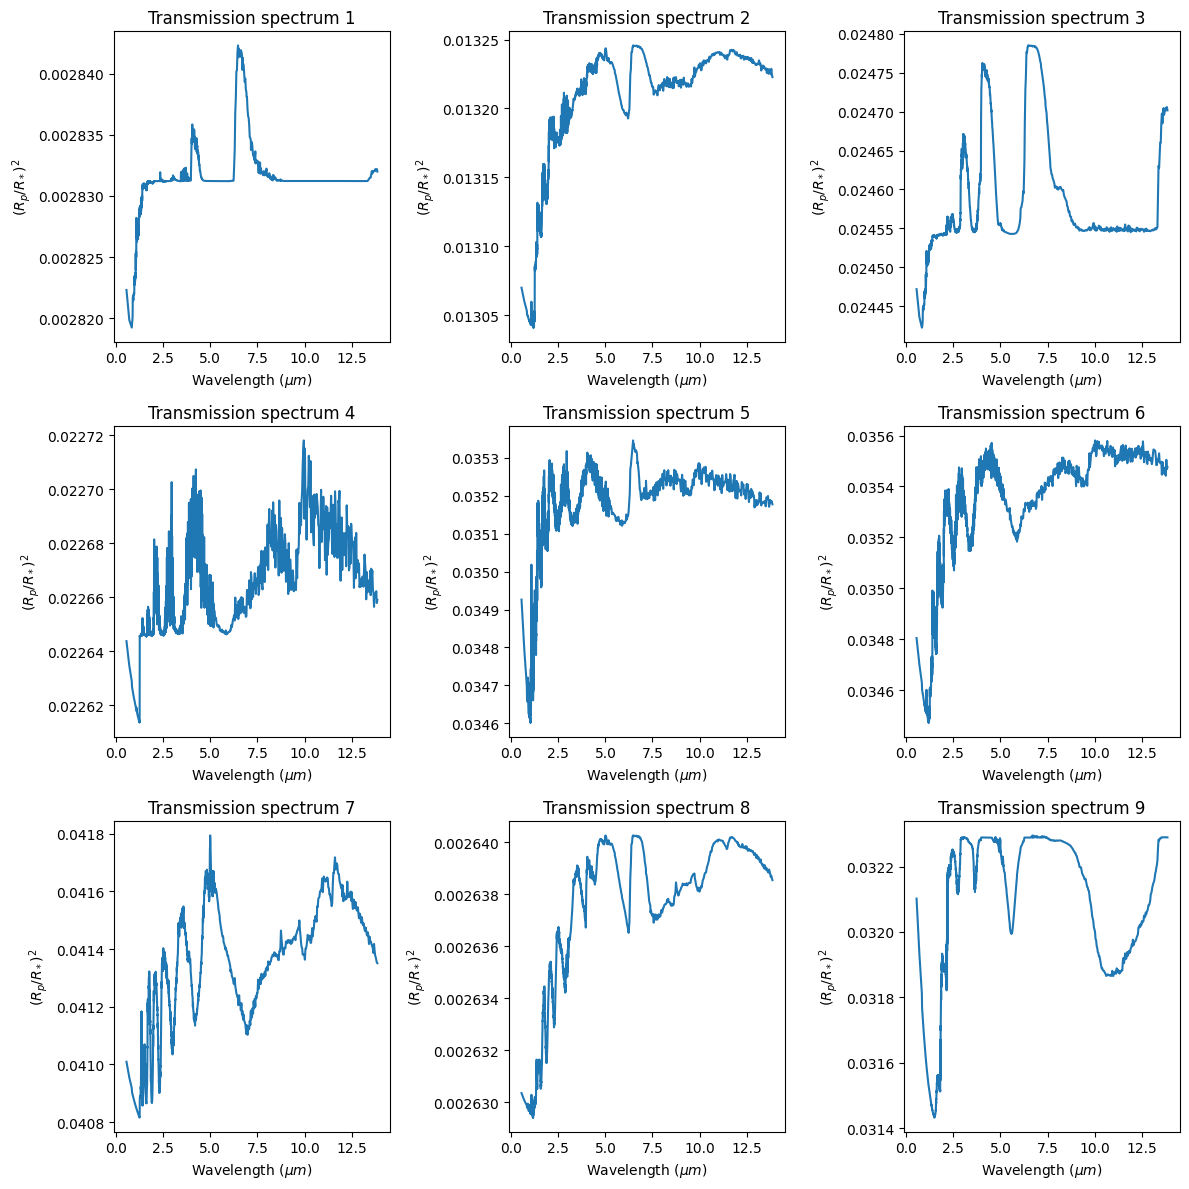

In [8]:
from ASPA import ASPA
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i, ax in enumerate(axs.flat):
    aspa = np.array(list(file_aspa[str(i)]))
    converted_spectrum = ASPA(norm_idx_path='/home/pagliaro/ASPARAGO/exogan_norm_bands_pos_10.grid').convert_ASPA_to_real_spectrum(aspa)
    ax.plot(wn_grid, converted_spectrum)
    ax.set_xlabel(f'Wavelength ($\mu m$)') 
    ax.set_ylabel(f'$(R_p/R_*)^2$')
    ax.set_title(f'Transmission spectrum {i+1}')

plt.tight_layout()